/tmp/ipykernel_148645/2533176565.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  position_players['cluster'] = kmeans.fit_predict(scaled_features)


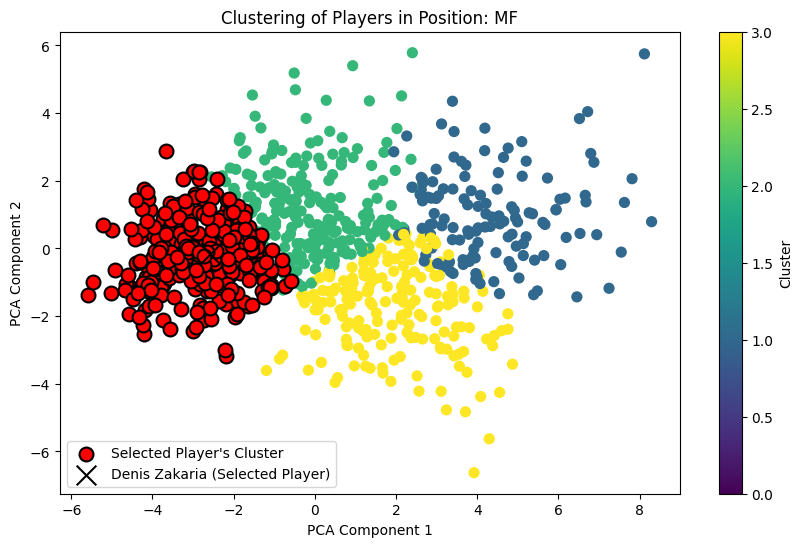

Denis Zakaria is in cluster 0.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load data
file_path = '../data/cleaned_scouting_report.csv'  # Replace with your path
data = pd.read_csv(file_path)

# Select a player by name
player_name = "Denis Zakaria"  # Replace this with user input or a specific player
selected_player = data[data['player_name'] == player_name]

# Get the player's position
position = selected_player['Position'].values[0]

# Filter the dataset to select players with the same position
position_players = data[data['Position'].str.contains(position, na=False)]

# Features for clustering (only numerical features)
features = position_players.select_dtypes(include=[np.number])

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)  # Adjust clusters if necessary
position_players['cluster'] = kmeans.fit_predict(scaled_features)

# Reduce dimensions using PCA for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

# Plot the clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_components[:, 0], pca_components[:, 1], c=position_players['cluster'], cmap='viridis', s=50)
plt.title(f'Clustering of Players in Position: {position}')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')

# Highlight the selected player's cluster
selected_cluster = position_players[position_players['player_name'] == player_name]['cluster'].values[0]
selected_cluster_points = pca_components[position_players['cluster'] == selected_cluster]

# Encircle the community/cluster
plt.scatter(selected_cluster_points[:, 0], selected_cluster_points[:, 1], color='red', edgecolor='black', linewidth=1.5, s=100, label='Selected Player\'s Cluster')

# Show which cluster the selected player is in
selected_player_pca = pca_components[position_players['player_name'] == player_name]

# Highlight the selected player within their cluster
plt.scatter(selected_player_pca[0, 0], selected_player_pca[0, 1], color='black', marker='x', s=200, label=f'{player_name} (Selected Player)', zorder=5)

# Add legend and show the plot
plt.legend()
plt.show()

# Extract the list of players in the same cluster as the selected player
players_in_same_cluster = position_players[position_players['cluster'] == selected_cluster]['player_name']

# Print the list of players in the same cluster
print(f"Players in the same cluster as {player_name}:")
for player in players_in_same_cluster:
    print(player)
